## Views (Visualizaciones)
--Medidas de tendencia central: La media indica el promedio de visualizaciones de cada episodio. Si la moda es diferente de la media, podría indicar que hay un número común de visualizaciones que la mayoría de los episodios tiende a recibir.

--Medidas de dispersión: Un rango amplio o una alta desviación estándar indican que algunos episodios son mucho más vistos que otros.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\Martina\Documents\TUP\Estadistica y Probabilidad\TPI")

df = pd.read_csv('data\simpsons_episodes.csv')
print(df)

def calcular_medidas_tendencia_central(serie):
    media = serie.mean()       
    mediana = serie.median()   
    moda = serie.mode()      
    return media, mediana, moda

def calcular_medidas_dispersion(serie):
    rango = serie.max() - serie.min()  # Rango
    varianza = serie.var()             # Varianza
    desviacion_estandar = serie.std()  # Desviación estándar
    return rango, varianza, desviacion_estandar

      id                                          image_url  imdb_rating  \
0     10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1     12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2     14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3     17  http://static-media.fxx.com/img/FX_Networks_-_...          8.1   
4     19  http://static-media.fxx.com/img/FX_Networks_-_...          8.0   
..   ...                                                ...          ...   
595  500  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   
596  502  http://static-media.fxx.com/img/FX_Networks_-_...          7.3   
597  511  http://static-media.fxx.com/img/FX_Networks_-_...          6.9   
598  542  http://static-media.fxx.com/img/FX_Networks_-_...          6.4   
599  548  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   

     imdb_votes  number_in_season  number_in_series original_air_date  \
0        1511.

In [ ]:
views = df['views'].dropna()

num_classes = int(1 + 3.322 * np.log10(len(views)))

freq_abs, bins = np.histogram(views, bins=num_classes)
freq_rel = freq_abs / len(views)  
freq_cum = np.cumsum(freq_abs)     

freq_table_views = pd.DataFrame({
    'Clase': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_views)

             Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0      144 - 17270                   25             0.041946   
1    17270 - 34396                   27             0.045302   
2    34396 - 51523                  336             0.563758   
3    51523 - 68649                  145             0.243289   
4    68649 - 85776                   52             0.087248   
5   85776 - 102902                    4             0.006711   
6  102902 - 120028                    5             0.008389   
7  120028 - 137155                    1             0.001678   
8  137155 - 154281                    0             0.000000   
9  154281 - 171408                    1             0.001678   

   Frecuencia Acumulada  
0                    25  
1                    52  
2                   388  
3                   533  
4                   585  
5                   589  
6                   594  
7                   595  
8                   595  
9                   596  


In [ ]:
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(views)
print(f"Medidas de tendencia central para views:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")

------------------------------------------
Medidas de tendencia central para views:
  Media: 48759.37751677852
  Mediana: 46036.0
  Moda: [170.0, 192.0, 38097.0, 43485.0, 44512.0, 63564.0]



In [4]:
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(views)
print(f"Medidas de dispersión para views:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

------------------------------------------
Medidas de dispersión para views:
  Rango: 171264.0
  Varianza: 315108952.1748887
  Desviación Estándar: 17751.308463741163



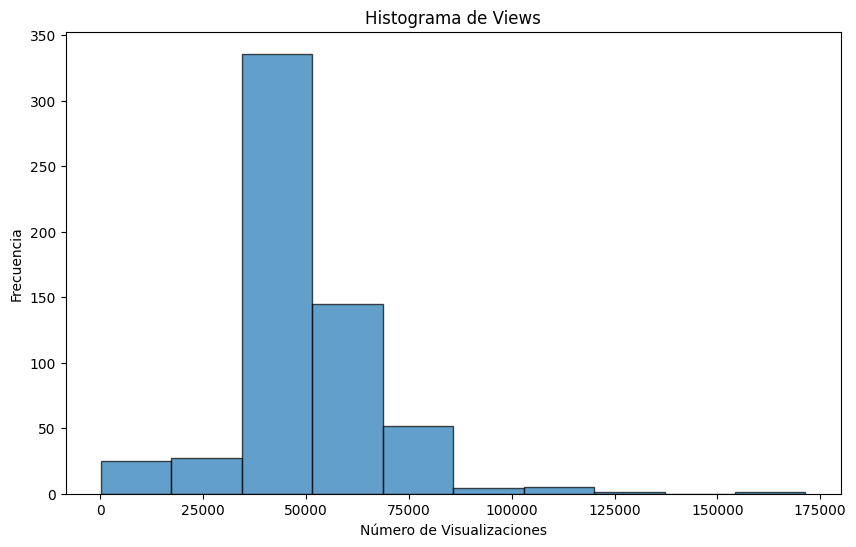

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(views, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia")
plt.show()

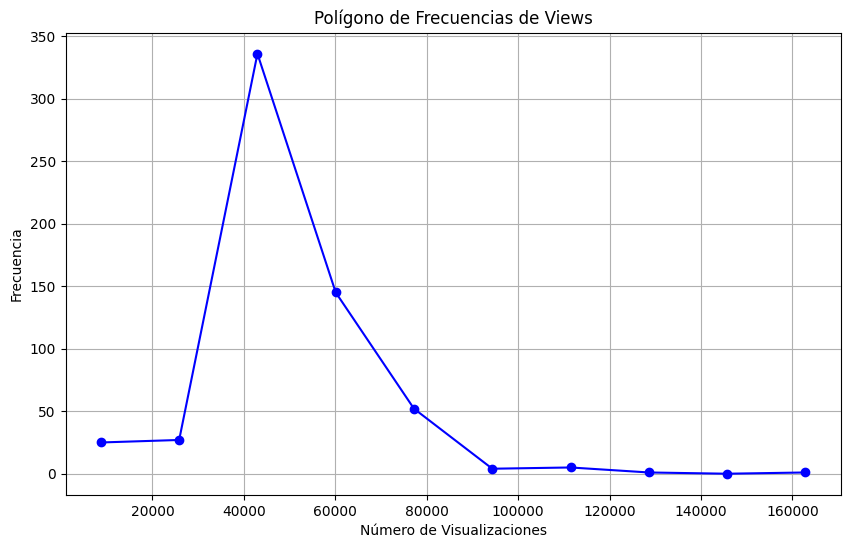

In [ ]:
freq_abs, bins = np.histogram(views, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

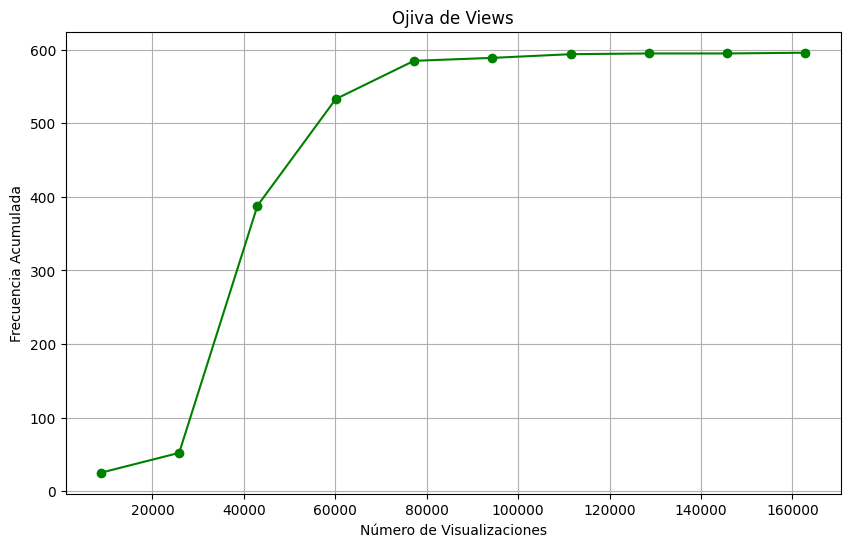

In [ ]:
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()
